

Project Structure

1_Data Loading and Exploration

Load the trading data and explore its characteristics.
Visualize key aspects such as distributions and time series trends.

2_Data Preprocessing

Clean the data by handling missing values and outliers.
Prepare the data for modeling through feature selection based on strong                 correlations.

3_ Data Analysis & Visualization

to understanding the data to communicating insights derived from the model's           predictions. They facilitate better decision-making and help ensure that the model     is  accurate

4_ Model Building

5_Machine Learning Algorithms

in Machine Learning  various Algorithms can be employed to train model and make         predictions based on the provided data.here are Machine Learning Algorithms which       we used in the model:

        Random forest classifier
        XGB Classifier 
       Voting classifier
       K-Nearest Neighbors classifier
       Decision Trees classifier
       Random Forestclassifier
       Gradient Boosting classifier

6_prediction:

Prediction is a fundamental aspect of modeling that provides several important         benefits across various domains

7_Model Deployment Use

 once the Machine Learning model for predicting heart disease has been train and        evaluated. it can be  deployed and utilized in real_world scenarios to assist in        early detection and prevention efforts.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv
/kaggle/input/heart-disease/heart_disease.csv


In [2]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
#preprocess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
#models
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
#check
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
#save
import pickle as pk

In [3]:
# Loading Data 
files = os.listdir('/kaggle/input/heart-disease')

# Read each file
for file in files:
    if file.endswith('.csv'):
        data = pd.read_csv(os.path.join('/kaggle/input/heart-disease', file))

In [4]:
data.shape

(319795, 18)

In [5]:
data.info

<bound method DataFrame.info of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  A

In [6]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [7]:
data.describe

<bound method NDFrame.describe of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex 

In [8]:
data.describe(include='O').transpose()

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


In [9]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
data.isna().values.any()

False

In [11]:
data[data.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [12]:
data['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

## Data Analysis & Visualization



In [13]:
# check how many people have  HeartDisease or not
data['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

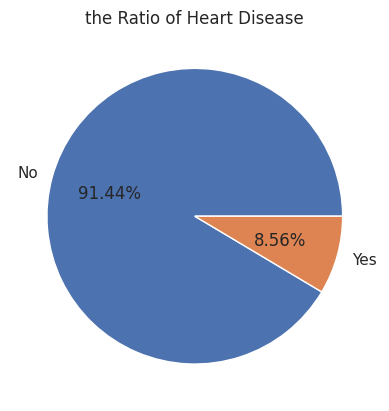

In [14]:
#show Ratio of HeartDisease from data
plt.pie(x = data['HeartDisease'].value_counts() ,autopct='%1.2f%%' ,labels=data['HeartDisease'].value_counts().index)
plt.title('the Ratio of Heart Disease')
plt.show

In [15]:
#how many of Male and female
data['Sex'].value_counts()

Sex
Female    167805
Male      151990
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

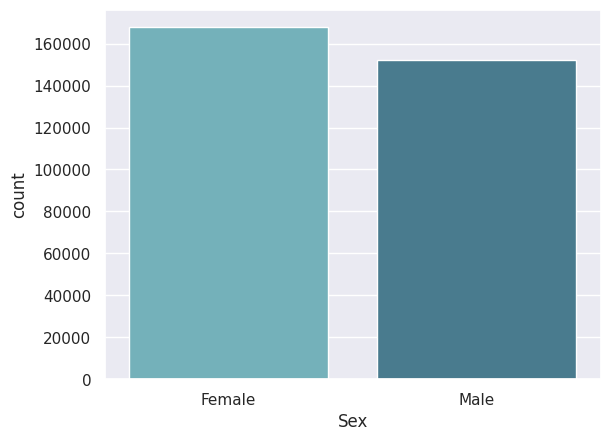

In [16]:
#show how many of Male and female
sns.countplot(x = data['Sex'], palette='GnBu_d')

In [17]:
data.groupby(['Sex','HeartDisease'])['HeartDisease'].count()


Sex     HeartDisease
Female  No              156571
        Yes              11234
Male    No              135851
        Yes              16139
Name: HeartDisease, dtype: int64

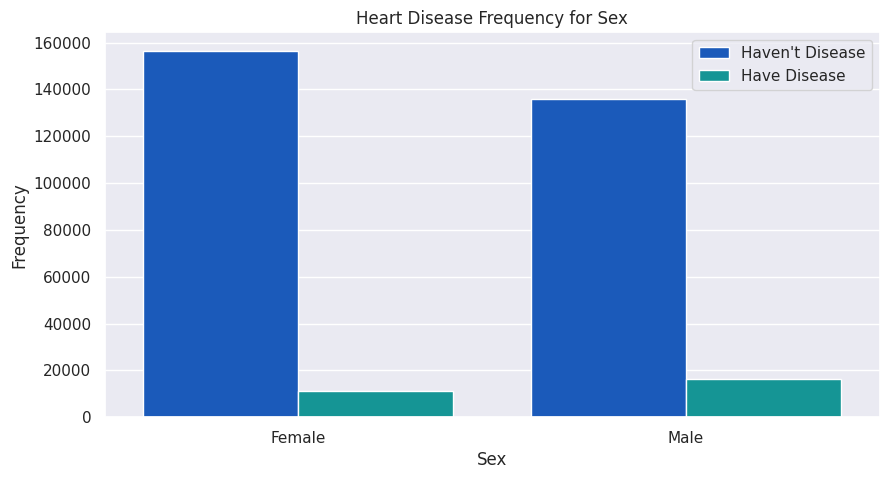

In [18]:
#show Heart Disease Frequency for Sex
plt.figure(figsize=(10,5))
sns.countplot(x = data['Sex'], data=data, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [19]:
#AgeCategory frequency
data['AgeCategory'].value_counts()

AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64

In [20]:
data.groupby(['AgeCategory','HeartDisease'])['HeartDisease'].count()


AgeCategory  HeartDisease
18-24        No              20934
             Yes               130
25-29        No              16822
             Yes               133
30-34        No              18527
             Yes               226
35-39        No              20254
             Yes               296
40-44        No              20520
             Yes               486
45-49        No              21047
             Yes               744
50-54        No              23999
             Yes              1383
55-59        No              27555
             Yes              2202
60-64        No              30359
             Yes              3327
65-69        No              30050
             Yes              4101
70-74        No              26218
             Yes              4847
75-79        No              17433
             Yes              4049
80 or older  No              18704
             Yes              5449
Name: HeartDisease, dtype: int64

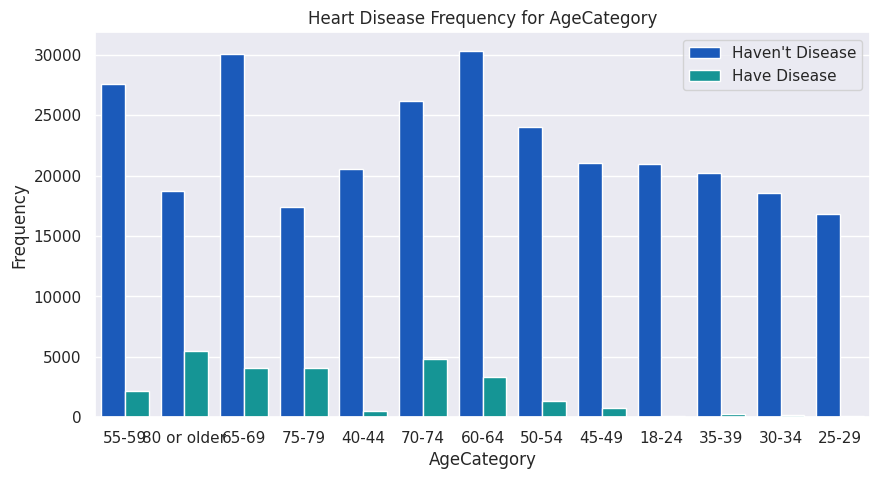

In [21]:
#show Heart Disease Frequency for AgeCategory
plt.figure(figsize=(10,5))
sns.countplot(x='AgeCategory', data=data, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [22]:
#the count of people Smoking
data['Smoking'].value_counts()

Smoking
No     187887
Yes    131908
Name: count, dtype: int64

In [23]:
data.groupby(['Sex','AgeCategory','Smoking','HeartDisease'])['HeartDisease'].count()


Sex     AgeCategory  Smoking  HeartDisease
Female  18-24        No       No              8252
                              Yes               40
                     Yes      No              1132
                              Yes               10
        25-29        No       No              5918
                                              ... 
Male    75-79        Yes      Yes             1563
        80 or older  No       No              3007
                              Yes             1092
                     Yes      No              3609
                              Yes             1729
Name: HeartDisease, Length: 104, dtype: int64

Text(0.5, 0, 'Smoking')

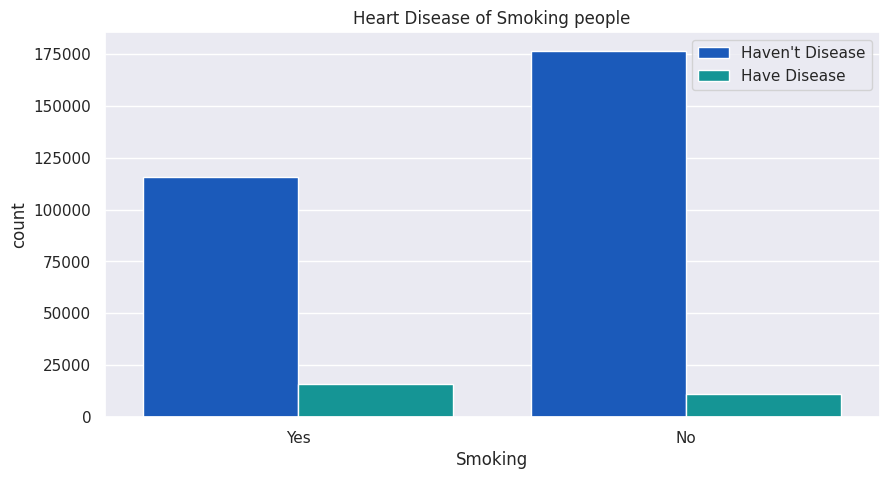

In [24]:
#show Heart Disease Frequency for Smoking
plt.figure(figsize=(10,5))
sns.countplot(x='Smoking',data=data,hue='HeartDisease',palette='winter')
plt.title('Heart Disease of Smoking people')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('Smoking')

In [25]:
# I want to Know how many people drink the AlcoholDrinking or not
data['AlcoholDrinking'].value_counts()

AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

In [26]:
data.groupby(['AlcoholDrinking','HeartDisease'])['HeartDisease'].count()


AlcoholDrinking  HeartDisease
No               No              271786
                 Yes              26232
Yes              No               20636
                 Yes               1141
Name: HeartDisease, dtype: int64

In [27]:
data.groupby(['Sex','AgeCategory','AlcoholDrinking','PhysicalActivity','HeartDisease'])['HeartDisease'].count()


Sex     AgeCategory  AlcoholDrinking  PhysicalActivity  HeartDisease
Female  18-24        No               No                No              1427
                                                        Yes                9
                                      Yes               No              7222
                                                        Yes               38
                     Yes              No                No                66
                                                                        ... 
Male    80 or older  No               Yes               Yes             1791
                     Yes              No                No                59
                                                        Yes               34
                                      Yes               No               128
                                                        Yes               41
Name: HeartDisease, Length: 208, dtype: int64

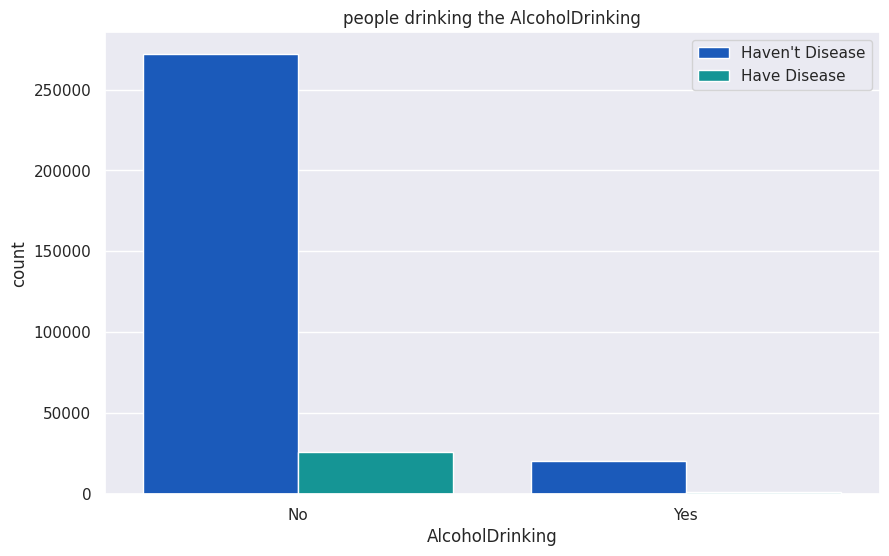

In [28]:
#Show how many people drink the AlcoholDrinking or not
plt.figure(figsize=(10,6))
sns.countplot(x=data['AlcoholDrinking'],data=data , hue='HeartDisease',palette='winter')
plt.title('people drinking the AlcoholDrinking')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('AlcoholDrinking')
plt.show()

In [29]:
#I want to know how many people have KidneyDisease
data['KidneyDisease'].value_counts()

KidneyDisease
No     308016
Yes     11779
Name: count, dtype: int64

In [30]:
#show the peolple who have KidneyDisease and HeartDisease
data.groupby(['KidneyDisease','HeartDisease'])['HeartDisease'].count()

KidneyDisease  HeartDisease
No             No              284098
               Yes              23918
Yes            No                8324
               Yes               3455
Name: HeartDisease, dtype: int64

In [31]:
data.groupby(['Sex','KidneyDisease','HeartDisease'])['HeartDisease'].count()


Sex     KidneyDisease  HeartDisease
Female  No             No              151743
                       Yes               9608
        Yes            No                4828
                       Yes               1626
Male    No             No              132355
                       Yes              14310
        Yes            No                3496
                       Yes               1829
Name: HeartDisease, dtype: int64

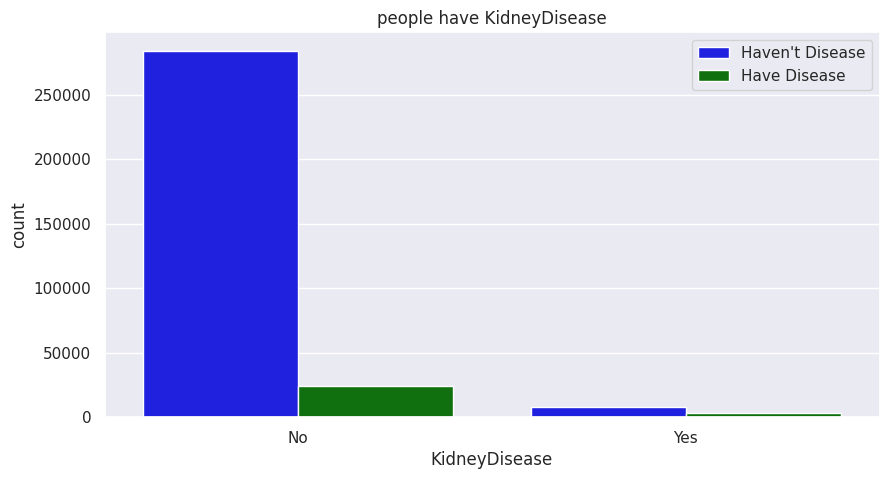

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=data , x = 'KidneyDisease',hue='HeartDisease',palette=['blue','green'])
plt.title('people have KidneyDisease')
plt.legend(["Haven't Disease", "Have Disease"])

In [33]:
data.groupby(['Sex','KidneyDisease'])['KidneyDisease'].count()


Sex     KidneyDisease
Female  No               161351
        Yes                6454
Male    No               146665
        Yes                5325
Name: KidneyDisease, dtype: int64

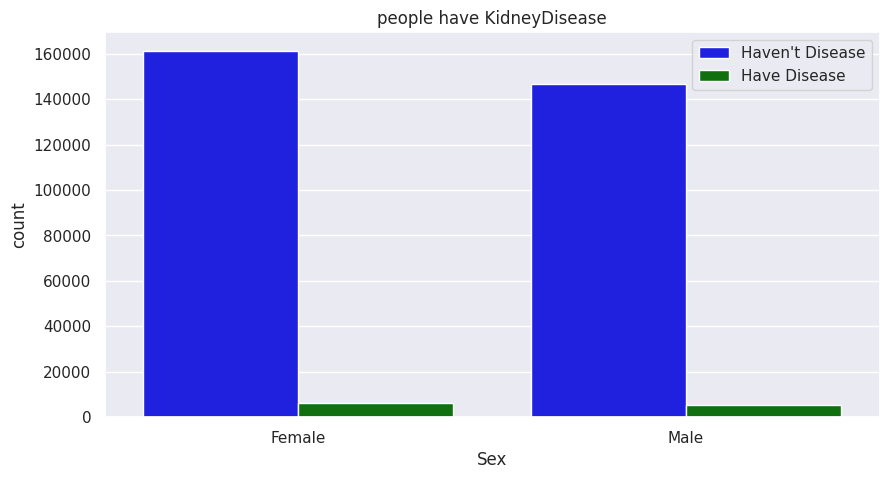

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=data , x = 'Sex',hue='KidneyDisease',palette=['blue','green'])
plt.title('people have KidneyDisease')
plt.legend(["Haven't Disease", "Have Disease"])

In [35]:
#Show the SkinCancer
data['SkinCancer'].value_counts()

SkinCancer
No     289976
Yes     29819
Name: count, dtype: int64

In [36]:
#Show people have SkinCancer
data.groupby(['Sex','SkinCancer'])['SkinCancer'].count()

Sex     SkinCancer
Female  No            152782
        Yes            15023
Male    No            137194
        Yes            14796
Name: SkinCancer, dtype: int64

Text(0.5, 1.0, 'people have SkinCancer')

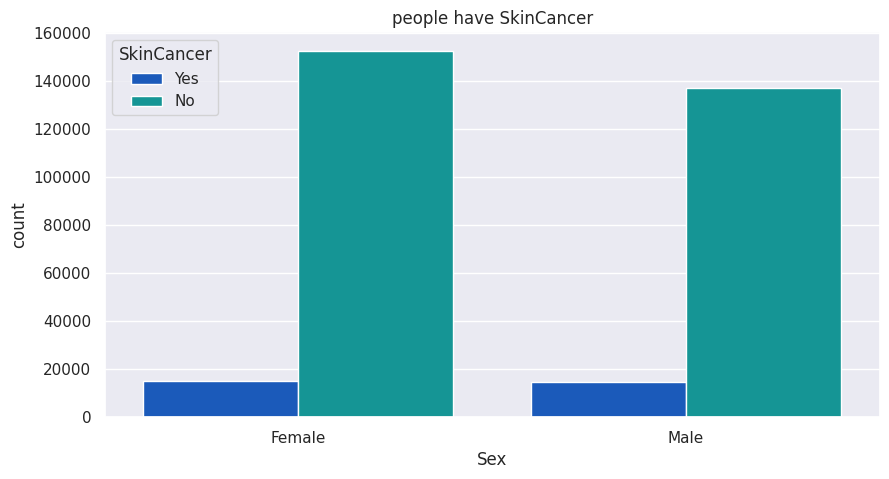

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex',data=data, hue='SkinCancer',palette='winter')
plt.title('people have SkinCancer')


In [38]:
data.groupby(['Sex','SkinCancer','HeartDisease'])['HeartDisease'].count()

Sex     SkinCancer  HeartDisease
Female  No          No              143226
                    Yes               9556
        Yes         No               13345
                    Yes               1678
Male    No          No              124357
                    Yes              12837
        Yes         No               11494
                    Yes               3302
Name: HeartDisease, dtype: int64

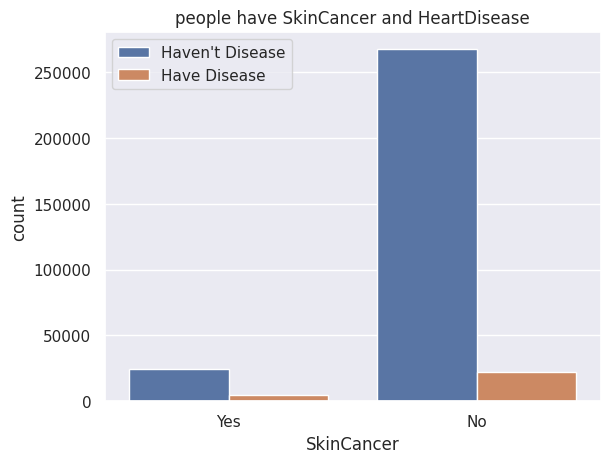

In [39]:
sns.countplot(x = 'SkinCancer', data=data , hue = 'HeartDisease')
plt.title('people have SkinCancer and HeartDisease')
plt.legend(["Haven't Disease", "Have Disease"])

## Check the Distribution and skewness of the features